In [113]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [114]:
df = pd.read_csv("../data/selected_M_best2.csv")
df = df.drop_duplicates()
print(df.head())

   Glucose  SkinThickness  Results
0    138.0           35.0        1
1     84.0           31.0        0
2    145.0            0.0        1
3    135.0           42.0        1
4    139.0           41.0        0


In [115]:
df.describe()

,Glucose,SkinThickness,Results
count,638.000000,638.000000,640.000000
mean,121.647335,23.213166,0.353125
std,33.039001,15.747767,0.478315
min,0.000000,0.000000,0.000000
25%,99.000000,13.000000,0.000000
50%,117.500000,25.500000,0.000000
75%,143.000000,34.000000,1.000000
max,199.000000,110.000000,1.000000


In [116]:
df_features = list(df.columns)
print(df_features)

['Glucose', 'SkinThickness', 'Results']


In [117]:
print((df[df_features]==0).sum())
print((df[df_features]=="NaN").sum())

Glucose            4
SkinThickness    137
Results          414
dtype: int64
Glucose          0
SkinThickness    0
Results          0
dtype: int64


In [118]:
#print((df[X.columns]).isNull().sum())
print(df["SkinThickness"].isnull().sum())
print(df.shape)
df = df.dropna(axis = 0)
print(df.shape)
#print(X)

2
(640, 3)
(638, 3)


In [119]:

# temp = df[df['BloodPressure']!=0.000000]
# df['BloodPressure'] = df['BloodPressure'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['Glucose']!=0.000000]
# df['Glucose'] = df['Glucose'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['BMI']!=0.000000]
# df['BMI'] = df['BMI'].replace( 0.000000 , temp.mean()[0])


print((df[df_features]==0).sum())


Glucose            4
SkinThickness    137
Results          413
dtype: int64


In [120]:
print(df.max())

Glucose          199.0
SkinThickness    110.0
Results            1.0
dtype: float64


In [121]:
print(df.min())

Glucose          0.0
SkinThickness    0.0
Results          0.0
dtype: float64


In [122]:
print(df.max() - df.min())

Glucose          199.0
SkinThickness    110.0
Results            1.0
dtype: float64


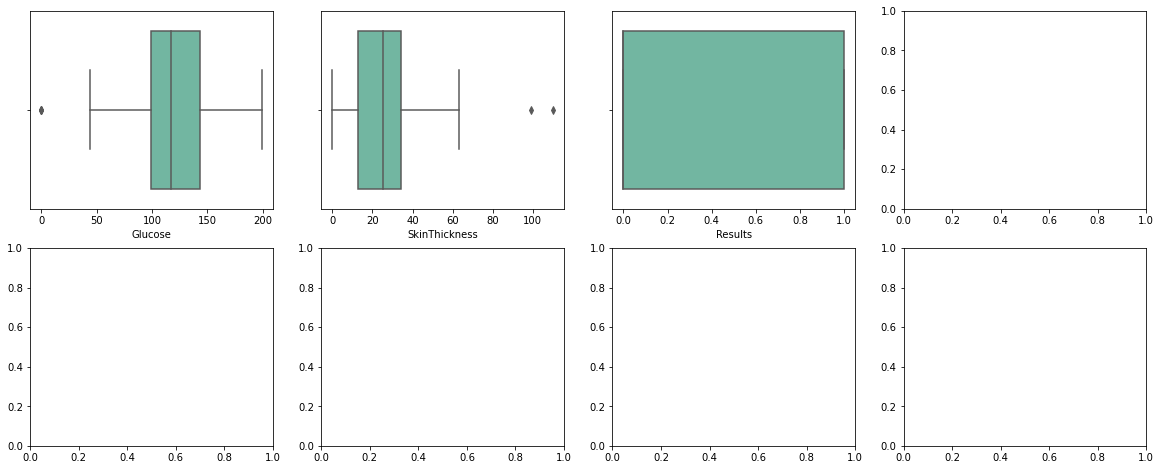

In [123]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
x_,y_ = 0,0
for i, column in enumerate(df.columns[:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    else:
        y_ += 1

In [124]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_01 = pd.DataFrame(data=dat, columns=cols)  
print(df_01.head())

Index(['Glucose', 'SkinThickness', 'Results'], dtype='object')
    Glucose  SkinThickness  Results
0  0.693467       0.318182      1.0
1  0.422111       0.281818      0.0
2  0.728643       0.000000      1.0
3  0.678392       0.381818      1.0
4  0.698492       0.372727      0.0


In [125]:
print(df_01.max() - df_01.min())

Glucose          1.0
SkinThickness    1.0
Results          1.0
dtype: float64


In [126]:
x = df_01.drop(["Results"], axis =1);
y = df_01["Results"]
print(y.value_counts())

0.0    413
1.0    225
Name: Results, dtype: int64


(array([413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 225.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

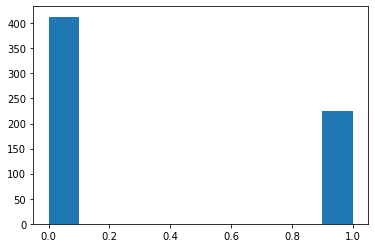

In [127]:
plt.hist(y)

0.0    250
1.0    225
Name: Results, dtype: int64


(array([250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 225.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

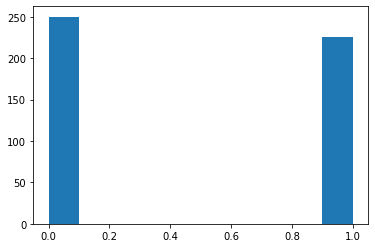

In [128]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.9, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    250
1.0    250
Name: Results, dtype: int64


(array([250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 250.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

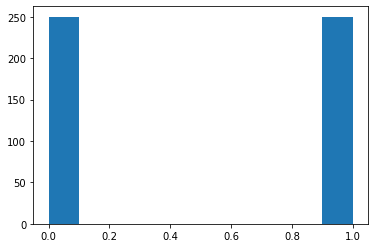

In [129]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [130]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  51.800
Standed deviation :  1.400
CV value :  3
Parameters :  {}
Accuracy :  49.399
Standed deviation :  2.482
CV value :  4
Parameters :  {}
Accuracy :  51.400
Standed deviation :  3.118
CV value :  5
Parameters :  {}
Accuracy :  51.000
Standed deviation :  3.286


In [131]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  55.000
Standed deviation :  0.600
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  56.198
Standed deviation :  0.916
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  56.000
Standed deviation :  3.709
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  56.000
Standed deviation :  4.336


In [132]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 17}
Accuracy :  62.600
Standed deviation :  1.400
CV value :  3
Parameters :  {'n_neighbors': 17}
Accuracy :  61.194
Standed deviation :  2.303
CV value :  4
Parameters :  {'n_neighbors': 5}
Accuracy :  63.200
Standed deviation :  2.828
CV value :  5
Parameters :  {'n_neighbors': 13}
Accuracy :  62.800
Standed deviation :  4.956


In [133]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  59.200
Standed deviation :  2.800
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  60.991
Standed deviation :  5.177
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  60.200
Standed deviation :  6.960
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  60.800
Standed deviation :  7.332


In [134]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  46.000
Standed deviation :  0.400
CV value :  3
Parameters :  {}
Accuracy :  48.990
Standed deviation :  4.307
CV value :  4
Parameters :  {}
Accuracy :  48.800
Standed deviation :  2.884
CV value :  5
Parameters :  {}
Accuracy :  46.200
Standed deviation :  5.075


In [135]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'rbf'}
Accuracy :  61.200
Standed deviation :  3.600
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  61.987
Standed deviation :  5.037
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  61.800
Standed deviation :  4.944
CV value :  5
Parameters :  {'kernel': 'poly'}
Accuracy :  62.400
Standed deviation :  5.748


In [136]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 110, 'max_features': 2, 'n_estimators': 100}
Accuracy :  56.800
Standed deviation :  4.000
CV value :  3
Parameters :  {'max_depth': 300, 'max_features': 2, 'n_estimators': 100}
Accuracy :  53.794
Standed deviation :  3.152
CV value :  4
Parameters :  {'max_depth': 90, 'max_features': 3, 'n_estimators': 100}
Accuracy :  54.600
Standed deviation :  5.318
CV value :  5
Parameters :  {'max_depth': 90, 'max_features': 5, 'n_estimators': 100}
Accuracy :  53.600
Standed deviation :  5.083
